In [52]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import gurobipy as gp
import numpy as np
%matplotlib inline

X, y = load_iris(return_X_y=True)
X = X[:100,:2]

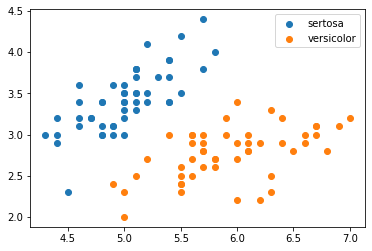

In [53]:
plt.scatter(X[:50,0], X[:50,1], label="sertosa")
plt.scatter(X[50:100,0], X[50:100,1], label="versicolor")
plt.legend()

In [59]:
n = 100
k = 2
m = gp.Model()
y_pred = {(i, j): m.addVar(vtype="B", name=f"y_{i}{j}") for i in range(n) for j in range(k)}

for i in range(n):
    m.addConstr(gp.quicksum(y_pred[i, j] for j in range(k)) == 1)

for j in range(k):
    m.addConstr(gp.quicksum(y_pred[i, j] for i in range(n)) >= 1)
    
MAX_ITER = 100
TOL = 0.0001
centers = X[np.random.choice(100, k, replace=False), :]
for i in range(MAX_ITER):
    old_centers = np.copy(centers)
    d = {(i, j): np.linalg.norm(centers[j] - X[i]) for i in range(n) for j in range(k)}
    m.setObjective(gp.quicksum(d[i, j] * y_pred[i, j] for i in range(n) for j in range(k)), gp.GRB.MAXIMIZE)
    m.optimize()
    
    labels = []
    for i in range(n):
        for j in range(k):
            if y_pred[i, j].X > 0.5:
                labels.append(j)
                
    labels = np.array(labels)
    for j in range(k):
        centers[j] = X[labels == j,:].mean(axis=0)
        
    resid = np.linalg.norm(old_centers - centers)
    print("Residual:", resid)
    if resid < TOL:
        break

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0xaa7e182e
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 102.2352750
Presolve removed 102 rows and 200 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 135.005 102.235 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.350053447629e+02, best bound 1.350053447629e+02, gap 0.0000%
Residual: 1.6725549693017847
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical pr

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x66c841a3
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 47.6698

Presolve removed 102 rows and 200 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 124.632 47.6698 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.246318322466e+02, best bound 1.246318322466e+02, gap 0.0000%
Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores,

Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x7687c83b
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 47.6698

Presolve removed 102 rows and 200 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 124.632 47.6698 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.246318322466e+02, best bound 1.246318322466e+02, gap 0.0000%
Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Th

Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x66c841a3
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 47.6698

Presolve removed 102 rows and 200 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 124.632 47.6698 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.246318322466e+02, best bound 1.246318322466e+02, gap 0.0000%
Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Th

Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x7687c83b
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 47.6698

Presolve removed 102 rows and 200 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 124.632 47.6698 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.246318322466e+02, best bound 1.246318322466e+02, gap 0.0000%
Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Th

Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x66c841a3
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 47.6698

Presolve removed 102 rows and 200 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 124.632 47.6698 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.246318322466e+02, best bound 1.246318322466e+02, gap 0.0000%
Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Th

Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x7687c83b
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 47.6698

Presolve removed 102 rows and 200 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 124.632 47.6698 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.246318322466e+02, best bound 1.246318322466e+02, gap 0.0000%
Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Th

Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x66c841a3
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 47.6698

Presolve removed 102 rows and 200 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 124.632 47.6698 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.246318322466e+02, best bound 1.246318322466e+02, gap 0.0000%
Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Th

Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x7687c83b
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 47.6698

Presolve removed 102 rows and 200 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 124.632 47.6698 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.246318322466e+02, best bound 1.246318322466e+02, gap 0.0000%
Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Th

Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x66c841a3
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 47.6698

Presolve removed 102 rows and 200 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 124.632 47.6698 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.246318322466e+02, best bound 1.246318322466e+02, gap 0.0000%
Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Th

Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x7687c83b
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 47.6698

Presolve removed 102 rows and 200 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 124.632 47.6698 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.246318322466e+02, best bound 1.246318322466e+02, gap 0.0000%
Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Th

Residual: 1.6334540037756706
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x66c841a3
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 47.6698

Presolve removed 102 rows and 200 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 124.632 47.6698 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.246318322466e+02, best bound 1.246318322466e+02, gap 0.0000%
Residual: 1.6334540037756706


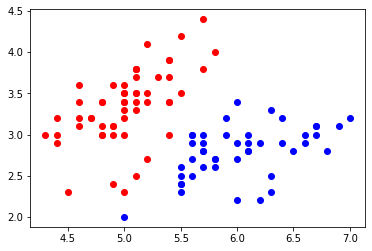

In [60]:
cs = {0: "red", 1: "blue"}

for i in range(n):
    for j in range(k):
        if y_pred[i, j].X > 0.5:
            plt.scatter(X[i, 0], X[i, 1], c = cs[j])